In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import rgb2hex
import seaborn as sns
import colour

# Load the Munsell data
df = pd.read_csv('/Users/georgij/Documents/Работа/Color-MMLs/data/munsell_3-3.csv')
# df = pd.read_csv('/Users/georgij/Documents/Работа/Color-MMLs/local_experiments/munsell_2-0 (1).csv')

# Normalize Y values to 1 for consistent brightness
df['Y_normalized'] = df['Y'] / 102

# Function to convert xyY to RGB using colour package
def xyY_to_rgb(x, y, Y):
    """Convert xyY color space to RGB using colour package"""
    try:
        # Create xyY array
        xyY = np.array([x, y, Y])
        print(xyY)
        
        # Convert xyY to XYZ
        XYZ = colour.xyY_to_XYZ(xyY)
        
        # Convert XYZ to sRGB
        sRGB = colour.XYZ_to_sRGB(XYZ)
        
        # Clamp values to [0, 1]
        sRGB = np.clip(sRGB, 0, 1)
        
        return sRGB
    except Exception as e:
        # Fallback to a neutral gray if conversion fails
        print(f"Color conversion failed for xyY({x}, {y}, {Y}): {e}")
        return np.array([0.5, 0.5, 0.5])

def draw_munsell_chain(df, hue_fixed=None, value_fixed=None, chroma_fixed=None, 
                      varying_param='chroma', figsize=(15, 5)):
    """
    Draw a chain of Munsell color swatches
    
    Parameters:
    - df: DataFrame with Munsell data
    - hue_fixed: Fixed hue value (e.g., '5R')
    - value_fixed: Fixed value (e.g., 5)
    - chroma_fixed: Fixed chroma (e.g., 8)
    - varying_param: Which parameter to vary ('hue', 'value', or 'chroma')
    - figsize: Figure size tuple
    """
    
    # Filter data based on fixed parameters
    filtered_df = df.copy()
    
    if hue_fixed is not None:
        filtered_df = filtered_df[filtered_df['H'] == hue_fixed]
    
    if value_fixed is not None:
        filtered_df = filtered_df[filtered_df['V'] == value_fixed]
        
    if chroma_fixed is not None:
        filtered_df = filtered_df[filtered_df['C'] == chroma_fixed]
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Calculate swatch dimensions
    n_colors = len(filtered_df)
    swatch_width = 1
    swatch_height = 10
    
    # Draw each color swatch
    for i, (_, row) in enumerate(filtered_df.iterrows()):
        # Convert xyY to RGB using normalized Y
        
        rgb = xyY_to_rgb(float(row['x']), float(row['y']), float(row['Y']) / 102)
        
        # Create rectangle for color swatch
        rect = patches.Rectangle((i, 0), swatch_width, swatch_height, 
                               facecolor=rgb, edgecolor='black', linewidth=0.5)
        ax.add_patch(rect)
        
        # Add label
        if varying_param == 'hue':
            label = f"{row['H']}"
        elif varying_param == 'value':
            label = f"V{row['V']}\n{row['H']}/C{row['C']}"
        elif varying_param == 'chroma':
            label = f"C{row['C']}\n{row['H']}/V{row['V']}"
        
        ax.text(i + swatch_width/2, -0.1, label, ha='center', va='top', 
                fontsize=12, rotation=45)
    
    # Set axis properties
    ax.set_xlim(0, n_colors)
    ax.set_ylim(-0.3, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Add title
    title_parts = []
    if hue_fixed: title_parts.append(f"Hue: {hue_fixed}")
    if value_fixed: title_parts.append(f"Value: {value_fixed}")
    if chroma_fixed: title_parts.append(f"Chroma: {chroma_fixed}")
    title_parts.append(f"Varying: {varying_param}")
    
    ax.set_title(" / ".join(title_parts), fontsize=12, pad=20)
    
    plt.tight_layout()
    return fig, ax

# Example usage and demonstrations
print("Munsell Color Chain Visualizer")
print("=" * 50)

# Show available hues
print("\nAvailable hues:")
hues = df['H'].unique()
print(f"Total hues: {len(hues)}")
print("Sample hues:", hues[:10])

# Show value and chroma ranges
print(f"\nValue range: {df['V'].min()} - {df['V'].max()}")
print(f"Chroma range: {df['C'].min()} - {df['C'].max()}")


Munsell Color Chain Visualizer

Available hues:
Total hues: 40
Sample hues: ['2.5R' '5.0R' '7.5R' '10.0R' '2.5YR' '5.0YR' '7.5YR' '10.0YR' '2.5Y'
 '5.0Y']

Value range: 1 - 10
Chroma range: 0 - 34


Example 1: Chroma variation for 5R hue, Value 5
Using colour package for accurate color conversion with normalized Y values
[ 0.298       0.34        0.18235294]
[ 0.282       0.367       0.17156863]
[ 0.259       0.399       0.15784314]
[ 0.24        0.424       0.14803922]
[ 0.221       0.447       0.14019608]
[ 0.198       0.47        0.13137255]
[ 0.179      0.49       0.1254902]
[ 0.157       0.511       0.11960784]
[ 0.134       0.531       0.11372549]
[ 0.111       0.551       0.10882353]
[ 0.089       0.57        0.10490196]
[ 0.066  0.589  0.1  ]


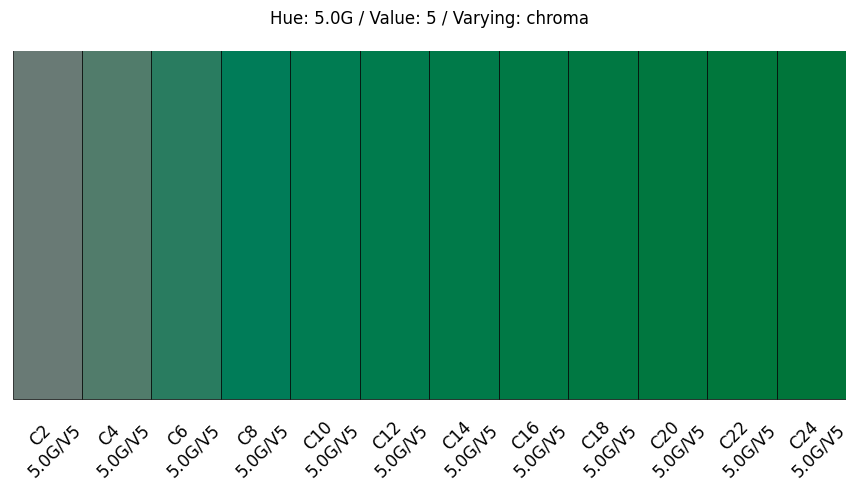

In [3]:
# Example 1: Chroma variation for a specific hue and value
print("Example 1: Chroma variation for 5R hue, Value 5")
print("Using colour package for accurate color conversion with normalized Y values")
fig1, ax1 = draw_munsell_chain(df, hue_fixed='5.0G', value_fixed=5, varying_param='chroma')
plt.show()


Example 1: Chroma variation for 5R hue, Value 5
Using colour package for accurate color conversion with normalized Y values
[ 0.341       0.315       0.17941176]
[ 0.374       0.312       0.16568627]
[ 0.407       0.308       0.15294118]
[ 0.441       0.302       0.14215686]
[ 0.473       0.296       0.13235294]
[ 0.505      0.29       0.1245098]
[ 0.534       0.283       0.11764706]
[ 0.564       0.277       0.11176471]
[ 0.594       0.271       0.10490196]


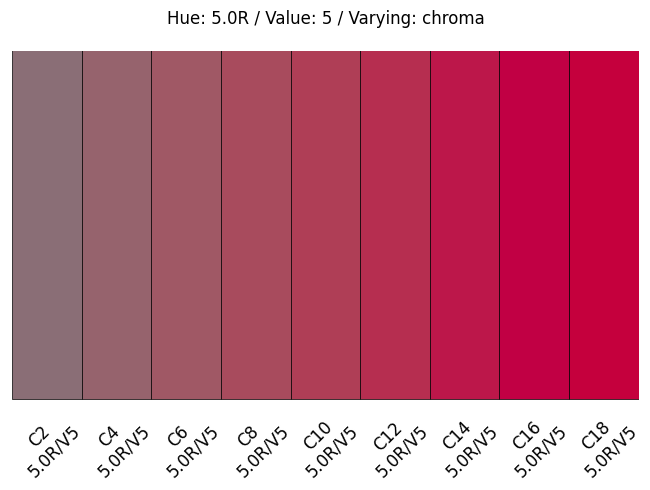

In [40]:
# Example 1: Chroma variation for a specific hue and value
print("Example 1: Chroma variation for 5R hue, Value 5")
print("Using colour package for accurate color conversion with normalized Y values")
fig1, ax1 = draw_munsell_chain(df, hue_fixed='5.0R', value_fixed=5, varying_param='chroma')
plt.show()


Example 1: Chroma variation for 5R hue, Value 5
Using colour package for accurate color conversion with normalized Y values
[ 0.3392      0.3192      0.19382353]
[ 0.374       0.322       0.19382353]
[ 0.4078      0.3238      0.19382353]
[ 0.4413      0.324       0.19382353]
[ 0.4747      0.3227      0.19382353]
[ 0.5071      0.3194      0.19382353]
[ 0.5341      0.3158      0.19382353]
[ 0.5637      0.3102      0.19382353]
[ 0.5918      0.3038      0.19382353]
[ 0.6142      0.297       0.19382353]


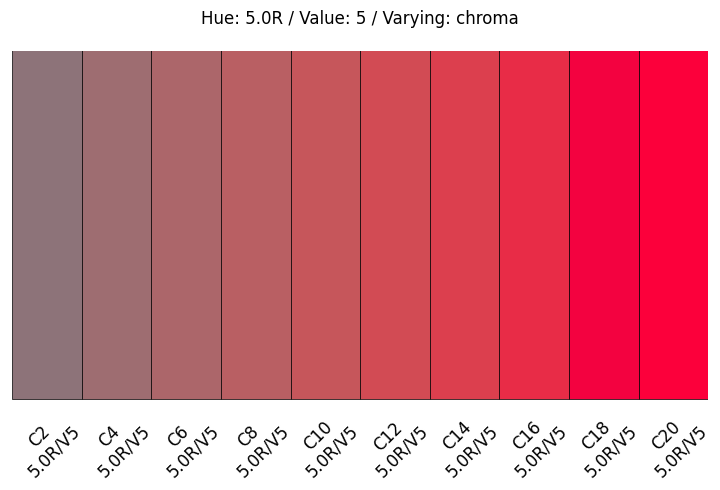

In [42]:
# Example 1: Chroma variation for a specific hue and value
print("Example 1: Chroma variation for 5R hue, Value 5")
print("Using colour package for accurate color conversion with normalized Y values")
fig1, ax1 = draw_munsell_chain(df_2, hue_fixed='5.0R', value_fixed=5, varying_param='chroma')
plt.show()


Example 5: Yellow family, Chroma 8, varying value
[ 0.494       0.495       0.09607843]
[ 0.454       0.462       0.16372549]
[ 0.426       0.441       0.25392157]
[ 0.407       0.426       0.37352941]
[ 0.394       0.414       0.51764706]
[ 0.382       0.404       0.70098039]
[ 0.374       0.396       0.92254902]


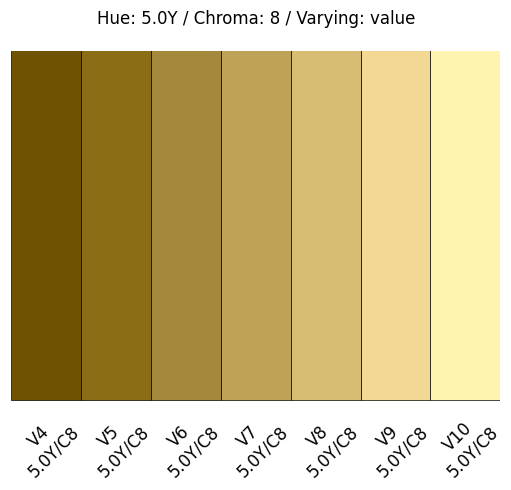

In [46]:
# Example 5: Yellow family with value variation
print("Example 5: Yellow family, Chroma 8, varying value")
fig5, ax5 = draw_munsell_chain(df, hue_fixed='5.0Y', chroma_fixed=8, varying_param='value')
plt.show()


In [47]:
# Additional utility functions for exploring the data
def explore_munsell_data(df):
    """Explore the Munsell dataset and show statistics"""
    print("Munsell Dataset Exploration")
    print("=" * 40)
    
    print(f"Total color samples: {len(df)}")
    print(f"Unique hues: {df['H'].nunique()}")
    print(f"Value range: {df['V'].min()} - {df['V'].max()}")
    print(f"Chroma range: {df['C'].min()} - {df['C'].max()}")
    
    print("\nHue distribution:")
    hue_counts = df['H'].value_counts().head(10)
    for hue, count in hue_counts.items():
        print(f"  {hue}: {count} samples")
    
    print("\nValue distribution:")
    value_counts = df['V'].value_counts().sort_index()
    for value, count in value_counts.items():
        print(f"  Value {value}: {count} samples")
    
    print("\nChroma distribution:")
    chroma_counts = df['C'].value_counts().sort_index()
    for chroma, count in chroma_counts.items():
        print(f"  Chroma {chroma}: {count} samples")

# Run the exploration
explore_munsell_data(df)


Munsell Dataset Exploration
Total color samples: 2985
Unique hues: 40
Value range: 1 - 10
Chroma range: 0 - 34

Hue distribution:
  2.5G: 127 samples
  10.0GY: 111 samples
  5.0G: 96 samples
  2.5P: 93 samples
  2.5PB: 87 samples
  10.0PB: 87 samples
  7.5PB: 87 samples
  7.5G: 85 samples
  2.5RP: 85 samples
  7.5GY: 84 samples

Value distribution:
  Value 1: 209 samples
  Value 2: 267 samples
  Value 3: 314 samples
  Value 4: 358 samples
  Value 5: 393 samples
  Value 6: 367 samples
  Value 7: 348 samples
  Value 8: 297 samples
  Value 9: 208 samples
  Value 10: 224 samples

Chroma distribution:
  Chroma 0: 100 samples
  Chroma 2: 400 samples
  Chroma 4: 395 samples
  Chroma 6: 365 samples
  Chroma 8: 328 samples
  Chroma 10: 304 samples
  Chroma 12: 272 samples
  Chroma 14: 248 samples
  Chroma 16: 196 samples
  Chroma 18: 141 samples
  Chroma 20: 88 samples
  Chroma 22: 61 samples
  Chroma 24: 38 samples
  Chroma 26: 22 samples
  Chroma 28: 13 samples
  Chroma 30: 7 samples
  Chroma

In [ ]:
def draw_munsell_on_cie_chromaticity(df, value_fixed, figsize=(12, 10)):
    """
    Draw Munsell colors for a specified Value on CIE chromaticity diagram
    
    Parameters:
    - df: DataFrame with Munsell data
    - value_fixed: Fixed value (e.g., 5)
    - figsize: Figure size tuple
    """
    
    # Filter data for the specified value
    filtered_df = df[df['V'] == value_fixed].copy()
    
    if len(filtered_df) == 0:
        print(f"No data found for Value {value_fixed}")
        return None, None
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot the spectral locus (horseshoe shape)
    # This is a simplified version - in practice you'd use more precise data
    wavelengths = np.linspace(380, 700, 100)
    x_locus = []
    y_locus = []
    
    for wl in wavelengths:
        # Approximate CIE 1931 color matching functions
        if 380 <= wl <= 700:
            x = 0.5 * np.sin(np.radians(wl - 380) * 0.8) + 0.3
            y = 0.4 * np.cos(np.radians(wl - 380) * 0.8) + 0.3
            x_locus.append(x)
            y_locus.append(y)
    
    # Plot spectral locus
    ax.plot(x_locus, y_locus, 'k-', linewidth=2, label='Spectral Locus')
    
    # Plot line of purples (connecting 380nm to 700nm)
    ax.plot([x_locus[0], x_locus[-1]], [y_locus[0], y_locus[-1]], 'k-', linewidth=2, label='Line of Purples')
    
    # Group data by hue for better visualization
    hues = sorted(filtered_df['H'].unique())
    colors_per_hue = {}
    
    for hue in hues:
        hue_data = filtered_df[filtered_df['H'] == hue]
        colors_per_hue[hue] = hue_data
    
    # Plot each hue as a connected line
    for i, (hue, hue_data) in enumerate(colors_per_hue.items()):
        # Sort by chroma
        hue_data_sorted = hue_data.sort_values('C')
        
        # Extract x, y coordinates
        x_coords = hue_data_sorted['x'].values
        y_coords = hue_data_sorted['y'].values
        
        # Convert to RGB for plotting
        rgb_colors = []
        for _, row in hue_data_sorted.iterrows():
            rgb = xyY_to_rgb(row['x'], row['y'], row['Y_normalized'])
            rgb_colors.append(rgb)
        
        # Plot the hue line
        ax.plot(x_coords, y_coords, 'o-', markersize=4, linewidth=1.5, 
                color=rgb_colors[0], alpha=0.7, label=f'{hue}')
        
        # Add chroma labels for some points
        for j, (_, row) in enumerate(hue_data_sorted.iterrows()):
            if row['C'] % 4 == 0:  # Label every 4th chroma step
                ax.annotate(f"C{int(row['C'])}", 
                           (row['x'], row['y']), 
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.8)
    
    # Add white point
    ax.plot(0.3127, 0.3290, 'wo', markersize=8, markeredgecolor='k', 
            markeredgewidth=2, label='White Point (D65)')
    
    # Set axis properties
    ax.set_xlabel('CIE x', fontsize=12)
    ax.set_ylabel('CIE y', fontsize=12)
    ax.set_title(f'Munsell Colors on CIE Chromaticity Diagram (Value {value_fixed})', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    # Set axis limits
    ax.set_xlim(0, 0.8)
    ax.set_ylim(0, 0.9)
    
    # Add legend (only show first few hues to avoid clutter)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:8], labels[:8], loc='upper right', fontsize=10)
    
    plt.tight_layout()
    return fig, ax

# Example usage
print("Drawing Munsell colors on CIE chromaticity diagram for Value 5")
fig, ax = draw_munsell_on_cie_chromaticity(df, value_fixed=5)
plt.show()


In [ ]:
import colour.plotting as cp


def plot_fixed_croma(df, chroma):
    df_chroma = df[df['C'] == chroma]
    fig, ax = cp.plot_chromaticity_diagram_CIE1931(show=False)
    ax.scatter(df_chroma['x'], df_chroma['y'], s=4)
    ax.set_xlim(0, 0.75)
    ax.set_ylim(0, 0.85)
    
def plot_fixed_value(df, value):
    df_chroma = df[df['V'] == value]
    fig, ax = cp.plot_chromaticity_diagram_CIE1931(show=False)
    ax.scatter(df_chroma['x'], df_chroma['y'], s=4)
    ax.set_xlim(0, 0.75)
    ax.set_ylim(0, 0.85)
    

In [5]:
df_2 = pd.read_csv('/Users/georgij/Documents/Работа/Color-MMLs/local_experiments/munsell_2-0 (1).csv')

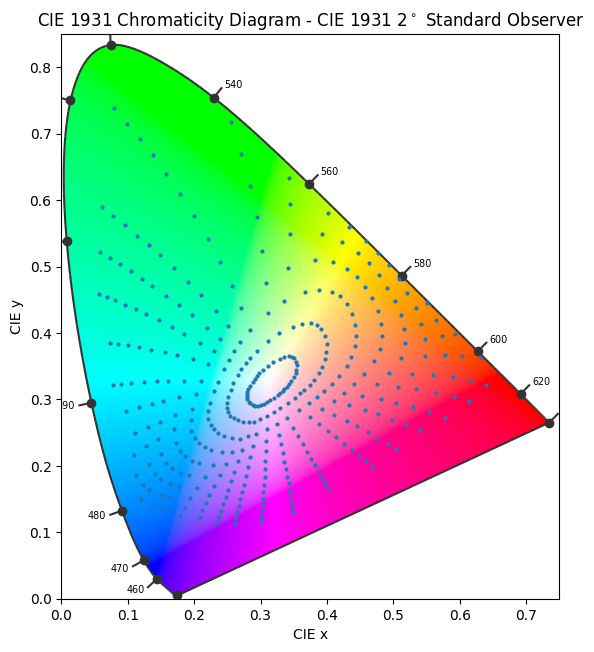

In [102]:
plot_fixed_value(df_2, 5)

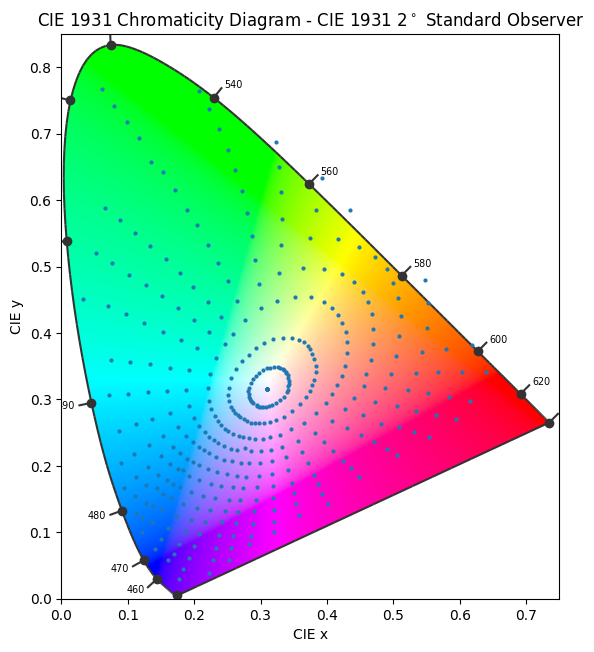

In [103]:
plot_fixed_value(df, 5)

[ 0.369       0.303       0.16372549]
[ 0.374       0.312       0.16568627]
[ 0.378       0.322       0.16862745]
[ 0.381       0.33        0.16960784]
[ 0.383       0.341       0.17352941]
[ 0.383      0.35       0.1745098]
[ 0.381       0.361       0.17745098]
[ 0.378       0.368       0.17941176]
[ 0.374       0.376       0.17941176]
[ 0.371       0.381       0.17941176]
[ 0.365       0.386       0.17941176]
[ 0.358       0.39        0.17941176]
[ 0.347       0.392       0.17941176]
[ 0.334       0.393       0.17745098]
[ 0.319      0.391      0.1745098]
[ 0.305       0.385       0.17352941]
[ 0.293       0.377       0.17156863]
[ 0.282       0.367       0.17156863]
[ 0.272       0.358       0.16960784]
[ 0.263       0.346       0.16862745]
[ 0.256       0.332       0.16568627]
[ 0.252       0.318       0.16372549]
[ 0.251       0.306       0.16372549]
[ 0.252      0.297      0.1627451]
[ 0.255      0.289      0.1627451]
[ 0.258      0.284      0.1627451]
[ 0.262      0.279      0.1

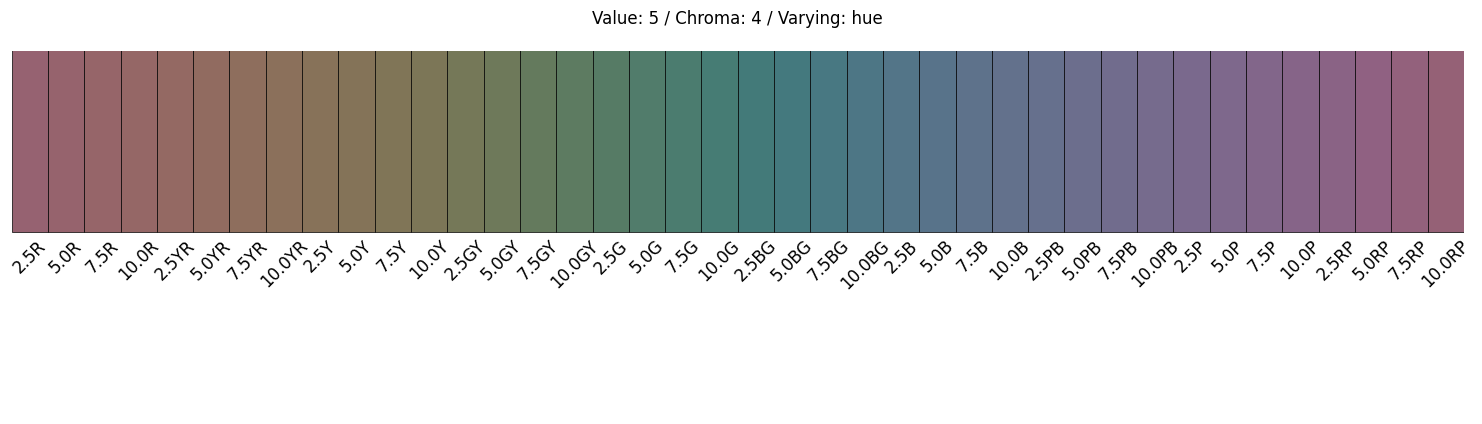

In [38]:
fig1, ax1 = draw_munsell_chain(df, value_fixed=5, chroma_fixed=4, varying_param='hue')

[ 0.45        0.284       0.00823529]
[ 0.42        0.297       0.02303922]
[ 0.399       0.305       0.05137255]
[ 0.384       0.309       0.09705882]
[ 0.374       0.312       0.16568627]
[ 0.368       0.315       0.25588235]
[ 0.361       0.315       0.37352941]
[ 0.355       0.316       0.52156863]
[ 0.351       0.317       0.70098039]
[ 0.348       0.317       0.92254902]


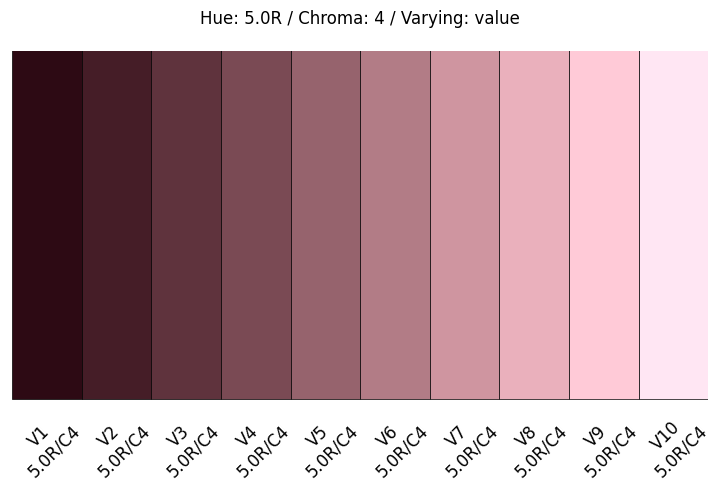

In [ ]:
fig1, ax1 = draw_munsell_chain(df, hue_fixed='5.0R', chroma_fixed=4, varying_param='value')

[ 0.31        0.316       0.11764706]
[ 0.317       0.288       0.10490196]
[ 0.324       0.261       0.09411765]
[ 0.33       0.237      0.0872549]
[ 0.334       0.217       0.08235294]
[ 0.338       0.199       0.07745098]
[ 0.343       0.18        0.07352941]
[ 0.346       0.163       0.06960784]
[ 0.35        0.144       0.06666667]
[ 0.353       0.127       0.06372549]
[ 0.356       0.11        0.06078431]


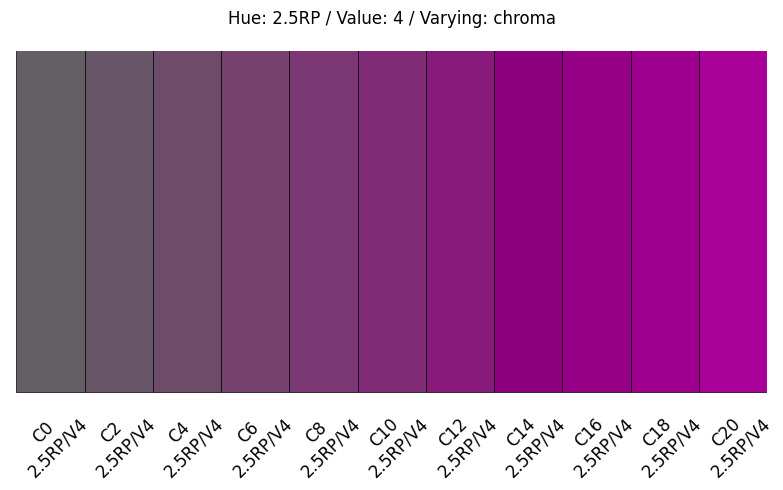

In [ ]:
fig1, ax1 = draw_munsell_chain(df, hue_fixed='2.5RP', value_fixed=4, varying_param='chroma')

[ 0.643       0.296       0.00627451]
[ 0.57        0.322       0.01872549]
[ 0.52        0.33        0.04284314]
[ 0.486       0.334       0.08431373]
[ 0.459       0.338       0.14705882]
[ 0.442       0.344       0.23137255]
[ 0.428       0.344       0.34019608]
[ 0.414       0.344       0.48235294]


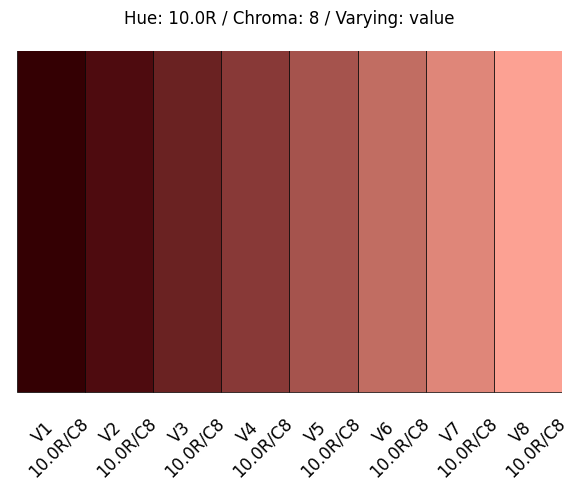

In [82]:
fig1, ax1 = draw_munsell_chain(df, hue_fixed='10.0R', chroma_fixed=8, varying_param='value')

In [54]:
df_2['Y'].max()

78.659999999999997

In [55]:
df['Y'].max()

102.5